In [1]:
!kaggle datasets download -d sbhatti/financial-sentiment-analysis


Dataset URL: https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 37.8MB/s]


In [3]:
!unzip financial-sentiment-analysis.zip

Archive:  financial-sentiment-analysis.zip
  inflating: data.csv                


In [48]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [47]:
from transformers import pipeline

In [5]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [6]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [7]:
classifier("This is such a great product")

[{'label': 'POSITIVE', 'score': 0.9998646974563599}]

In [8]:
classifier("This product made my work easy")

[{'label': 'POSITIVE', 'score': 0.9986526966094971}]

In [9]:
classifier("This product is not bad at all")

[{'label': 'POSITIVE', 'score': 0.9988565444946289}]

In [36]:
classifier("I can't say this product was really handy")

[{'label': 'NEGATIVE', 'score': 0.9992951154708862}]

In [10]:
classifier([""])

[{'label': 'POSITIVE', 'score': 0.7481208443641663}]

In [11]:
column=["Id","Place","Sentiment","Text"]

In [12]:
df=pd.read_csv("financialsentiment.csv")

In [13]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [14]:
df['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

<Axes: >

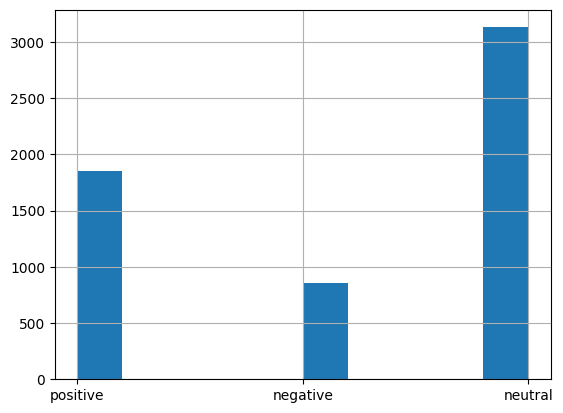

In [15]:
df["Sentiment"].hist()

In [21]:
df = df[~df['Sentiment'].isin(['neutral'])]

In [22]:
target_map={"positive":1,"negative":0}

In [23]:
df["target"]=df["Sentiment"].map(target_map)

In [24]:
df.head()

,Sentence,Sentiment,target
0,The GeoSolutions technology will leverage Bene...,positive,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,0
2,"For the last quarter of 2010 , Componenta 's n...",positive,1
5,$SPY wouldn't be surprised to see a green close,positive,1
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,0


In [25]:
len(df)

2712

In [28]:
texts=df["Sentence"].to_list()
predictions=classifier(texts)

In [29]:
predictions

[{'label': 'POSITIVE', 'score': 0.9991747736930847},
 {'label': 'NEGATIVE', 'score': 0.9931260347366333},
 {'label': 'NEGATIVE', 'score': 0.9939583539962769},
 {'label': 'POSITIVE', 'score': 0.7501711845397949},
 {'label': 'NEGATIVE', 'score': 0.9242026209831238},
 {'label': 'NEGATIVE', 'score': 0.9996311664581299},
 {'label': 'POSITIVE', 'score': 0.9766585230827332},
 {'label': 'POSITIVE', 'score': 0.9963717460632324},
 {'label': 'NEGATIVE', 'score': 0.9994007349014282},
 {'label': 'POSITIVE', 'score': 0.6208164095878601},
 {'label': 'NEGATIVE', 'score': 0.9963082075119019},
 {'label': 'NEGATIVE', 'score': 0.9885679483413696},
 {'label': 'POSITIVE', 'score': 0.976690948009491},
 {'label': 'POSITIVE', 'score': 0.9572045803070068},
 {'label': 'NEGATIVE', 'score': 0.5825561285018921},
 {'label': 'NEGATIVE', 'score': 0.7913761734962463},
 {'label': 'POSITIVE', 'score': 0.999650239944458},
 {'label': 'POSITIVE', 'score': 0.5402374267578125},
 {'label': 'NEGATIVE', 'score': 0.99694049358367

In [30]:
probs=[d['score']if d["label"].startswith("P") else 1-d['score'] for d in predictions ]

In [31]:
probs

[0.9991747736930847,
 0.006873965263366699,
 0.0060416460037231445,
 0.7501711845397949,
 0.07579737901687622,
 0.0003688335418701172,
 0.9766585230827332,
 0.9963717460632324,
 0.0005992650985717773,
 0.6208164095878601,
 0.0036917924880981445,
 0.011432051658630371,
 0.976690948009491,
 0.9572045803070068,
 0.4174438714981079,
 0.20862382650375366,
 0.999650239944458,
 0.5402374267578125,
 0.0030595064163208008,
 0.0004432797431945801,
 0.0014800429344177246,
 0.0004290938377380371,
 0.0041321516036987305,
 0.6448284387588501,
 0.0866430401802063,
 0.07160139083862305,
 0.8954825401306152,
 0.9952623844146729,
 0.02386718988418579,
 0.9995203018188477,
 0.01730060577392578,
 0.9946730732917786,
 0.02123159170150757,
 0.00038760900497436523,
 0.011242568492889404,
 0.0015780925750732422,
 0.0024906396865844727,
 0.9967396855354309,
 0.0006476044654846191,
 0.013332784175872803,
 0.967613160610199,
 0.00470733642578125,
 0.3097549080848694,
 0.00029653310775756836,
 0.09268385171890259

In [32]:
preds=[1 if d["label"].startswith("P") else 0 for d in predictions]

In [33]:
preds=np.array(preds)

In [35]:
print("Accuracy:",np.mean(df["target"]==preds))

Accuracy: 0.6589233038348082


In [37]:
cm=confusion_matrix(df["target"],preds,normalize="true")
cm

array([[0.96395349, 0.03604651],
       [0.48272138, 0.51727862]])

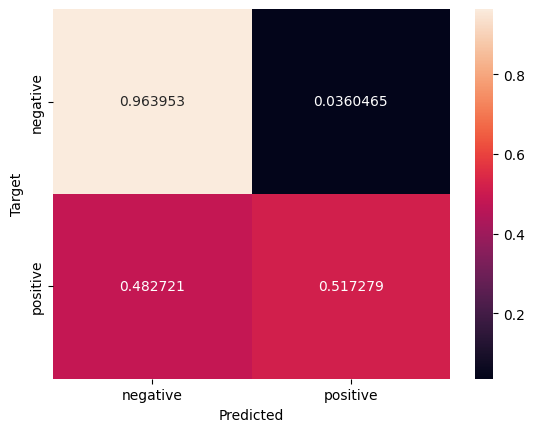

In [38]:
def plot_cm(cm):
  classes=["negative","positive"]
  df_cm=pd.DataFrame(cm,index=classes,columns=classes)
  ax=sn.heatmap(df_cm,annot=True,fmt="g")
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [42]:
f1_score(df["target"],preds)

0.6744104188665963

In [43]:
f1_score(1-df['target'],1-preds)

0.6418892760356175

In [44]:
roc_auc_score(df["target"],probs)

0.8888429855844091

In [45]:
roc_auc_score(1-df["target"],1-np.array(probs))

0.8888429855844091